In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import subprocess

In [2]:
plt.rcParams['figure.figsize'] = 10, 6

In [3]:
nbfolder = get_ipython().starting_dir
def path(*xs):
    return os.path.join(nbfolder, '..', *xs)

### Running algorithm

In [4]:
instance = 'A-n37-k5'
executable = 'cfrs'

In [5]:
os.makedirs(path('out'), exist_ok=True)

filename_in = path('instances', instance+'.vrp')
filename_out = path('out', instance+'.txt')

In [6]:
with open(filename_in, 'r') as file_in:
    with open(filename_out, 'w') as file_out:
        p = subprocess.Popen(path('bin', executable), stdin=file_in, stdout=file_out)

### Reading Input

In [7]:
with open(filename_in, 'r') as file_in:
    lines_in = [s.strip() for s in file_in.readlines()]

In [8]:
s = lines_in.index('NODE_COORD_SECTION') + 1
e = lines_in.index('DEMAND_SECTION')
data_in = [[int(x) for x in lines_in[l].split(' ')] for l in range(s, e)]
xs = {d[0]: d[1] for d in data_in}
ys = {d[0]: d[2] for d in data_in}

### Reading Output

In [10]:
with open(filename_out, 'r') as file_in:
    n_clusters = int(file_in.readline().strip())
    clusters = []
    for i in range(n_clusters):
        clusters.append([int(x) for x in file_in.readline().strip().split(' ')])
    total_cost = float(file_in.readline().strip())

### Plotting Solution

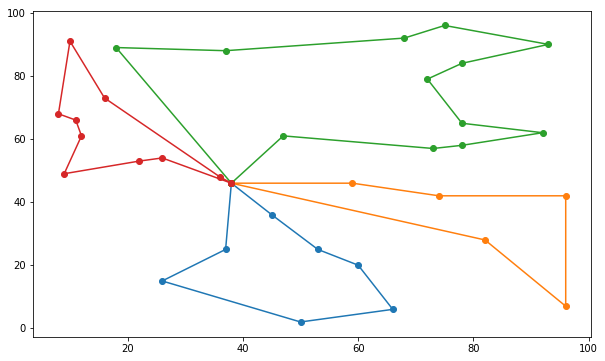

In [12]:
for cluster in clusters:
    plt.plot(
        [xs[i] for i in [1]+cluster+[1]], 
        [ys[i] for i in [1]+cluster+[1]], 
        'o-'
    )